In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


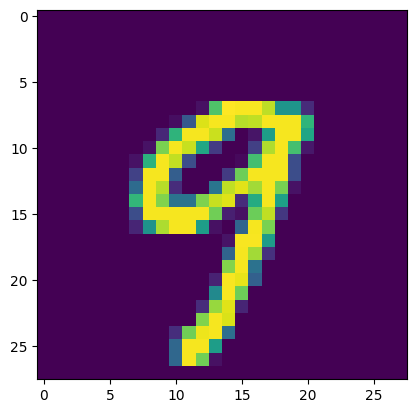

In [9]:
plt.imshow(X_train[45])

In [10]:
X_train = X_train/256
X_test = X_test/256

In [12]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [14]:
# prompt: I am gonna generate a convolutional layer

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8844 - loss: 0.4071
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9753 - loss: 0.0846
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9818 - loss: 0.0609
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9852 - loss: 0.0482
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9875 - loss: 0.0398


In [15]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9771 - loss: 0.0692


[0.05509091168642044, 0.9819999933242798]

In [16]:
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0


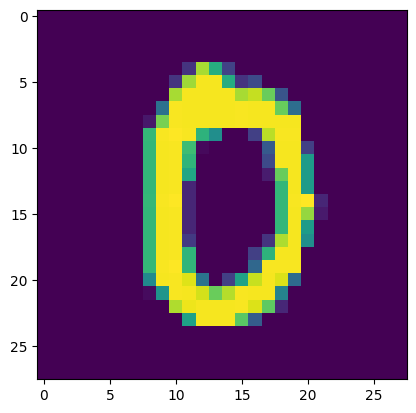

In [25]:
print(np.argmax(y_predicted[1535]))
plt.imshow(X_test[1535])

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    0,    5,    1,    2,    0],
       [   0, 1126,    2,    2,    2,    0,    2,    0,    1,    0],
       [   1,    2, 1016,    2,    2,    0,    1,    5,    3,    0],
       [   0,    0,    3,  999,    0,    4,    0,    1,    3,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   3,    0,    0,   11,    0,  871,    6,    0,    1,    0],
       [   4,    3,    0,    0,    4,    2,  944,    0,    1,    0],
       [   0,    3,    9,    3,    4,    0,    0, 1004,    1,    4],
       [   4,    0,    6,    0,    2,    2,    3,    3,  951,    3],
       [   3,    1,    0,    6,   22,    6,    0,    7,    6,  958]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

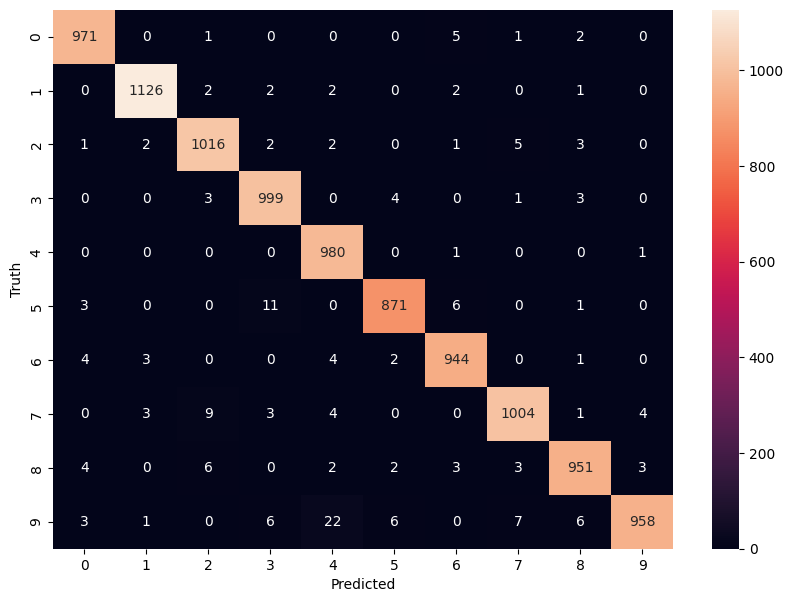

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [36]:
print(y_predicted_labels[:50])
print(y_test[:50])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
